# Profanity Filter Using CNN
- Model that detects if the word is aswear word or contains profanity

## NAME:        DAVID MUGISHA
### REG:        2022/HD05/1765U
### STUDENT NO: 2200701765

In [1]:
import os
import numpy as np 
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mdsyble/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mdsyble/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# import data
data = pd.read_csv("profanity_data.csv")

### Get detailed insights about the data

In [3]:
data.head()

is_offensive                                               text
0             0  Then go to the village pump and suggest they c...
1             1  ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2             1     Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3             0  It is better for Atabay not helping the banned...
4             0  "is in CamelCase.  ""SiCKO"" is not CamelCase,...

In [4]:
data.tail()

is_offensive                                               text
184349             0                   Template:uw-vandalism2 >  | Talk
184350             1   Regrets are for pussies. Shit happens, deal w...
184351             0  Could this possibly be the origin of popular g...
184352             0  "Your article submission has been declined, an...
184353             0  .\nEditors can not move articles except inside...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184354 entries, 0 to 184353
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   is_offensive  184354 non-null  int64 
 1   text          184350 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


- Check for class imbalance

In [6]:
#Count class
class_counts = data['is_offensive'].value_counts()
print(class_counts)

0    147509
1     36845
Name: is_offensive, dtype: int64


In [7]:
#Proposition
class_proportions = data['is_offensive'].value_counts(normalize=True)
print(class_proportions)

0    0.80014
1    0.19986
Name: is_offensive, dtype: float64


- There is a class imbalance issue since non offences senteces are more than 80% of the entire dataset.
- **Anomaly Detection:** If the profane texts are very rare, it might make sense to treat this as an anomaly detection problem instead of a classification problem.
- **We willl Use Evaluation Metrics Suited for Imbalanced Datasets:** Accuracy is not a good metric when dealing with imbalanced datasets. Precision, recall, F1-score, AUC-ROC are better alternatives.
- **Class Weights:** Many deep learning libraries, including TensorFlow and PyTorch, allow you to assign different weights to different classes when computing the loss. You can assign a higher weight to the minority class to make the model pay more attention to it.

In [8]:
print(data.isnull().sum())

is_offensive    0
text            4
dtype: int64


In [9]:
data.count()

is_offensive    184354
text            184350
dtype: int64

In [10]:
#Since null values are few, we shall just drop them
data = data.dropna()
print(data.isnull().sum())

is_offensive    0
text            0
dtype: int64


### Remove punctuations 
- Remove special characters, punctuations and digits from the data.

In [11]:
data['text'] = data['text'].str.replace('[^\w\s]|[\d]|[\n]|[\r]', '', regex=True)

In [12]:
data.head()

is_offensive                                               text
0             0  Then go to the village pump and suggest they c...
1             1  ANTI GREEK NATIONALIS WIKIPEDIA Hi AlexikouaYo...
2             1       Dis hoe wasnt dis violent on Lottery Ticket 
3             0  It is better for Atabay not helping the banned...
4             0  is in CamelCase  SiCKO is not CamelCase so the...

## Convert all text to lowercase
- Ensure the model treats words like 'Hello' and 'hello' the same

In [13]:
data['text'] = data['text'].str.lower()

In [14]:
data.head()

is_offensive                                               text
0             0  then go to the village pump and suggest they c...
1             1  anti greek nationalis wikipedia hi alexikouayo...
2             1       dis hoe wasnt dis violent on lottery ticket 
3             0  it is better for atabay not helping the banned...
4             0  is in camelcase  sicko is not camelcase so the...

### Remove stopwords
- Stop word like "the", "is", "and", "in", and many others.

In [15]:
# Get English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [16]:
data['text'] = data['text'].apply(lambda text: remove_stopwords(text))

In [17]:
data.head()

is_offensive                                               text
0             0    go village pump suggest change language rfc set
1             1  anti greek nationalis wikipedia hi alexikouayo...
2             1           dis hoe wasnt dis violent lottery ticket
3             0   better atabay helping banned vandals pushing pov
4             0  camelcase sicko camelcase camelcase rule r bal...

## Lemmatization/Stemming:
- Lemmatization does this based on the morphological analysis of words, and is generally more sophisticated than stemming as it considers the context and part of speech of the word. Stemming, on the other hand, often simply chops off word endings. 
- Create a function to perform lemmatization:

In [18]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# # Function to perform lemmatization
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word, pos='v') for word in text.split()])

In [19]:
#Perform Lemmatization
data['lemmatized_text'] = data['text'].apply(lambda text: lemmatize_text(text))

In [20]:
data.head()

is_offensive                                               text  \
0             0    go village pump suggest change language rfc set   
1             1  anti greek nationalis wikipedia hi alexikouayo...   
2             1           dis hoe wasnt dis violent lottery ticket   
3             0   better atabay helping banned vandals pushing pov   
4             0  camelcase sicko camelcase camelcase rule r bal...   

                                     lemmatized_text  
0    go village pump suggest change language rfc set  
1  anti greek nationalis wikipedia hi alexikouayo...  
2           dis hoe wasnt dis violent lottery ticket  
3            better atabay help ban vandals push pov  
4  camelcase sicko camelcase camelcase rule r bal...

### Final lemmatized text

In [21]:
final_data = data.drop('text', axis=1)
data.head()

is_offensive                                               text  \
0             0    go village pump suggest change language rfc set   
1             1  anti greek nationalis wikipedia hi alexikouayo...   
2             1           dis hoe wasnt dis violent lottery ticket   
3             0   better atabay helping banned vandals pushing pov   
4             0  camelcase sicko camelcase camelcase rule r bal...   

                                     lemmatized_text  
0    go village pump suggest change language rfc set  
1  anti greek nationalis wikipedia hi alexikouayo...  
2           dis hoe wasnt dis violent lottery ticket  
3            better atabay help ban vandals push pov  
4  camelcase sicko camelcase camelcase rule r bal...

In [22]:
final_data.head()

is_offensive                                    lemmatized_text
0             0    go village pump suggest change language rfc set
1             1  anti greek nationalis wikipedia hi alexikouayo...
2             1           dis hoe wasnt dis violent lottery ticket
3             0            better atabay help ban vandals push pov
4             0  camelcase sicko camelcase camelcase rule r bal...

In [23]:
final_data.to_csv('final-clean-data.csv', index=False)

## Visualization of data
### Word Clouds
- A word cloud (or tag cloud) is a visual representation of text data. It displays a list of words, the importance of each being shown with font size or color. This format is useful for quickly perceiving the most prominent terms in your text data.

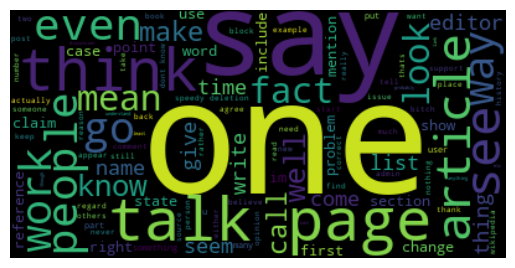

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text' is your column of interest in the DataFrame 'df'
text_data = ' '.join(final_data['lemmatized_text'])

wordcloud = WordCloud().generate(text_data)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Bar Plots of Top N Words
- A bar plot can give you insights into the most common words in your text data.

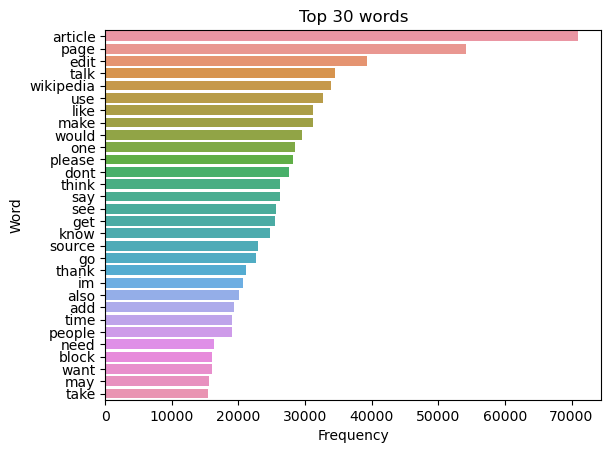

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = CountVectorizer().fit(final_data['lemmatized_text'])
bag_of_words = vectorizer.transform(final_data['lemmatized_text'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

# Get top 30 words
top_words = words_freq[:30]
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=df_top_words)
plt.title('Top 30 words')
plt.show()


### Splitting the Data using Stratified split

In [26]:
# X = final_data['lemmatized_text']

# Y = final_data['is_offensive']

# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=42)

## Vectorization
- Using Contextual Word Embeddings - This is more complex and can yeild better result.<br/>
These are state-of-the-art NLP models that generate word embeddings based on the word's context in a sentence. They could potentially provide the highest accuracy in profanity detection as they can understand the semantics and the context of the text. However, these models are complex and require more computational resources.
- Other methods include (Bag of Words (BoW) or CountVectorizer, TF-IDF Vectorizer, & Word Embeddings (Word2Vec, GloVe))

### Using Contextual Word Embeddings
- This code tokenizes and encodes each piece of text in the 'text' column and then applies the pre-trained BERT model to it. The output is the hidden states of the BERT model, which are 768-dimensional vectors that can be used as feature vectors for your machine learning model.<br/>

Note:<br/>

- BertTokenizer and BertModel are loading the 'bert-base-uncased' version of BERT, which is the basic version of BERT that does not care about casing. There are many different versions of BERT you can use depending on your needs.<br/>

- The encode_text function is applying the tokenizer and model to each piece of text. The tokenizer converts the text into a format that BERT can understand, and the model generates the contextual word embeddings.<br/>

- This approach may require a lot of memory if your text data is large. You may need to process your text data in smaller batches if you run into memory issues.<br/>

- Training a model on these feature vectors can take a lot of computational resources, so be prepared for long training times if your dataset is large.<br/>

- Also, remember to handle the model's input length limitations. BERT requires all input sequences to be the same length (512 tokens for 'bert-base-uncased'). In this code, any texts longer than 512 tokens are truncated, and any texts shorter than 512 tokens are padded with special tokens.<br/>

- It's worth noting that setting up a profanity filter using BERT (or any contextual word embeddings) would generally require a labelled dataset of some kind. The embeddings themselves won't inherently recognize profanity – you'd typically use them as input features to a machine learning model that's been trained to classify text as profane or not based on these embeddings.<br/>

In [27]:
# encoded_data = final_data;

# from transformers import BertTokenizer, BertModel
# # Load pre-trained model tokenizer (vocabulary)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Load pre-trained model
# model = BertModel.from_pretrained('bert-base-uncased')

# # Function to encode text
# def encode_text(text):
#     encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512, padding='max_length')
#     output = model(**encoded_input)
#     return output.last_hidden_state.detach().numpy().squeeze()

# # Apply the function to the text column
# encoded_data['encoded_text'] = encoded_data['lemmatized_text'].apply(encode_text)


## Use Bag of word for Vectorization
- For now we will use bag of word because of the limitations in processing

In [28]:
# from sklearn.feature_extraction.text import CountVectorizer
# # Vectorize the text data
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train).toarray()
# X_test_vectorized = vectorizer.transform(X_test).toarray()

## Define weights to cater for class imbalance

In [29]:
# from sklearn.utils import class_weight
# # Defining class weights
# weights = class_weight.compute_class_weight('balanced',
#                                                  classes = np.unique(y_train),
#                                                  y = y_train)

# weights = dict(enumerate(weights))

In [30]:
# weights

## Define and train CNN model

### Shape data for CNN

In [31]:
# # Reshape data for CNN
# X_train_CNN = np.expand_dims(X_train_vectorized, axis=1)
# X_test_CNN = np.expand_dims(X_test_vectorized, axis=1)

In [32]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import layers

# # Defining the model
# CNNmodel = Sequential()
# CNNmodel.add(layers.Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_CNN.shape[1],1)))
# CNNmodel.add(layers.MaxPooling1D(pool_size=2))
# CNNmodel.add(layers.Flatten())
# CNNmodel.add(layers.Dense(1, activation='sigmoid'))

# # Compiling the model
# CNNmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Training the model
# history = CNNmodel.fit(X_train_CNN, y_train, epochs=10, verbose=1, 
#           validation_data=(X_test_CNN, y_test), class_weight=class_weights_dict)

In [33]:
# history

- Using **CNN** would work if we use Vectorization algorithms like word embedding.
- Because of processing resouces, we shall use LSTM

## Using LSTM (Long Short Term Memory)
- A Reccurent Neural Network (RNN)

In [34]:
# from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# from keras.models import Sequential
# # Parameters for the LSTM model
# vocab_size = len(vectorizer.vocabulary_)
# embedding_dim = 50
# max_length = X_train_vectorized.shape[1]
# output_dim = 1

# # Construct the LSTM model
# LSTMmodel = Sequential()
# LSTMmodel.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
# LSTMmodel.add(SpatialDropout1D(0.2))
# LSTMmodel.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# LSTMmodel.add(Dense(output_dim, activation='sigmoid'))

# # Compile the model
# LSTMmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # Train the model
# LSTMmodel.fit(X_train_vectorized, y_train, epochs=10, batch_size=64, class_weight=weights)

In [35]:
# # Evaluate the model on the test data
# scores = model.evaluate(X_test_vectorized, y_test, verbose=0)
# print("Test accuracy:", scores[1])

## Using Random Forest Classifier

In [36]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.decomposition import PCA
# from sklearn.metrics import accuracy_score, plot_confusion_matrix
# from joblib import dump

# # Reduce dimensionality
# pca = PCA(n_components=100)  # adjust n_components based on your data
# X_train_pca = pca.fit_transform(X_train_vectorized)
# X_test_pca = pca.transform(X_test_vectorized)

# # Train the model
# clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
# clf.fit(X_train_pca, y_train)

# # Make predictions
# y_pred = clf.predict(X_test_pca)

# # Print accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("accuracy is: ", accuracy)

# # Plot confusion matrix
# plot_confusion_matrix(clf, X_test_pca, y_test)

# # Save the model
# dump(clf, 'rf.joblib') 


In [37]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report, plot_confusion_matrix
# from joblib import dump
# import matplotlib.pyplot as plt

# # Specify the parameters for randomized search
# param_distributions = {'n_estimators': [50, 100, 200],
#                        'max_depth': [None, 10, 20, 30],
#                        'min_samples_split': [2, 5, 10],
#                        'min_samples_leaf': [1, 2, 4]}

# # Use RandomizedSearchCV to find the best parameters
# clf = RandomForestClassifier(random_state=42)
# random_search = RandomizedSearchCV(estimator=clf, 
#                                    param_distributions=param_distributions,
#                                    n_iter=20,  # you can change this number
#                                    cv=5, 
#                                    random_state=42)
# random_search.fit(X_train_vectorized, y_train)

# # Fit the model with the best parameters
# best_clf = random_search.best_estimator_
# best_clf.fit(X_train_vectorized, y_train)

# # Make predictions
# y_pred = best_clf.predict(X_test_vectorized)

# # Print classification report
# report = classification_report(y_test, y_pred)
# print(report)

# # Print accuracy
# accuracy = best_clf.score(X_test_vectorized, y_test)
# print("accuracy is: ", accuracy)

# # Plot confusion matrix
# plot_confusion_matrix(best_clf, X_test_vectorized, y_test)

# # Save the model
# dump(best_clf, 'rf_optimized.joblib') 


# Reducing the traing data
- Because of the limitations on the processing resources, we will reduce the traing data of especially the class with more data
- Downsampling the majority class

In [38]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184350 entries, 0 to 184353
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   is_offensive     184350 non-null  int64 
 1   lemmatized_text  184350 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


In [39]:
#DownSample
from sklearn.utils import resample

# Let's say your DataFrame is df and class column is 'class'
# Let's assume 'class' has two categories: 0 for majority and 1 for minority.

df_majority = final_data[final_data['is_offensive'] == 0]
df_minority = final_data[final_data['is_offensive'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
sampled_data = pd.concat([df_majority_downsampled, df_minority])

# Check new class counts
print(sampled_data['is_offensive'].value_counts())

0    36845
1    36845
Name: is_offensive, dtype: int64


In [40]:
sampled_data.head()

is_offensive                                    lemmatized_text
49219              0                      hey idea get review phightins
141411             0  go favre page say completions attemps tds yard...
182903             0  additionally anyone find actual documentation ...
67273              0  problem cymbalta perhaps thousands doctor tens...
58914              0  welcomehello welcome wikipedia thank contribut...

In [41]:
#Count class
class_counts = sampled_data['is_offensive'].value_counts()
print(class_counts)

0    36845
1    36845
Name: is_offensive, dtype: int64


# Reduce the data further for training purposes
- This is done because of the limitation of processing resources

In [60]:
final_sample = sampled_data.sample(frac=0.04, random_state=42)

In [61]:
#Count class
class_counts = final_sample['is_offensive'].value_counts()
print(class_counts)

1    1489
0    1459
Name: is_offensive, dtype: int64


In [62]:
sample_X = final_sample['lemmatized_text']

sample_Y = final_sample['is_offensive']

X_train, X_test, y_train, y_test = train_test_split(sample_X,sample_Y, test_size = 0.3, random_state=42)
X_train.count()

2063

## Use Bag of word for Vectorization
- For now we will use bag of word because of the limitations in processing

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()

accuracy is:  0.8429378531073446


/Users/mdsyble/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


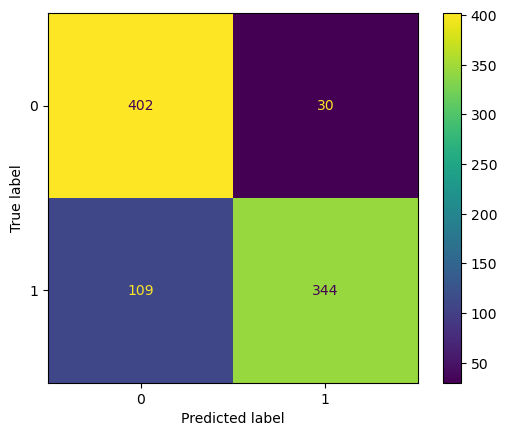

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA
from joblib import dump

# # Reduce dimensionality
# pca = PCA(n_components=100)  # adjust n_components based on your data
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# Train the model
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
clf.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = clf.predict(X_test_vectorized)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ", accuracy)

# Plot confusion matrix
plot_confusion_matrix(clf, X_test_vectorized, y_test)


# LSTM Model

In [73]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from keras.layers import Dropout

# Let's assume our data is in the variables `texts` (the documents) and `labels` (binary labels indicating whether each document is profane)

# Preprocess the texts
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(sample_X)
X = tokenizer.texts_to_sequences(sample_X)
X = pad_sequences(X)

# Convert labels to one-hot encoding if they are not already
y = pd.get_dummies(sample_Y).values

# Build the LSTM model
embed_dim = 100
lstm_out = 20

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model
epochs = 25
batch_size = 64

model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, verbose = 2)

# Evaluate the model
y_pred = model.predict(X_test)

# Convert probability distribution to class labels
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)


Epoch 1/25
37/37 - 126s - loss: 0.5970 - accuracy: 0.6777 - 126s/epoch - 3s/step
Epoch 2/25
37/37 - 126s - loss: 0.3234 - accuracy: 0.8660 - 126s/epoch - 3s/step
Epoch 3/25
37/37 - 129s - loss: 0.1851 - accuracy: 0.9296 - 129s/epoch - 3s/step
Epoch 4/25
37/37 - 130s - loss: 0.1194 - accuracy: 0.9538 - 130s/epoch - 4s/step
Epoch 5/25
37/37 - 126s - loss: 0.0841 - accuracy: 0.9690 - 126s/epoch - 3s/step
Epoch 6/25
37/37 - 126s - loss: 0.0690 - accuracy: 0.9763 - 126s/epoch - 3s/step
Epoch 7/25
37/37 - 136s - loss: 0.0554 - accuracy: 0.9796 - 136s/epoch - 4s/step
Epoch 8/25
37/37 - 131s - loss: 0.0368 - accuracy: 0.9877 - 131s/epoch - 4s/step
Epoch 9/25
37/37 - 140s - loss: 0.0295 - accuracy: 0.9894 - 140s/epoch - 4s/step
Epoch 10/25
37/37 - 124s - loss: 0.0252 - accuracy: 0.9915 - 124s/epoch - 3s/step
Epoch 11/25
37/37 - 124s - loss: 0.0215 - accuracy: 0.9928 - 124s/epoch - 3s/step
Epoch 12/25
37/37 - 122s - loss: 0.0160 - accuracy: 0.9949 - 122s/epoch - 3s/step
Epoch 13/25
37/37 - 126s 

In [74]:
# Save the model
# model.save('final_model.h5')

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       294
           1       0.91      0.86      0.89       296

    accuracy                           0.89       590
   macro avg       0.89      0.89      0.89       590
weighted avg       0.89      0.89      0.89       590



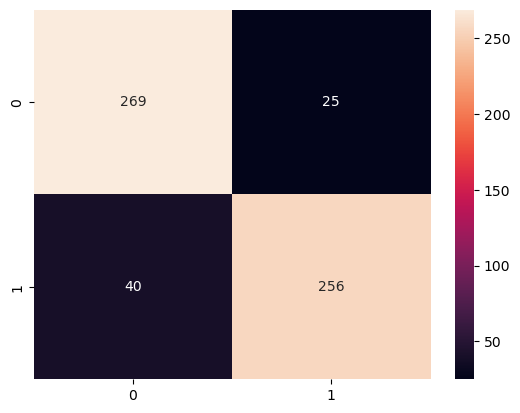

In [81]:
# Generate predictions on the test set
y_test_pred = y_pred

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_test_pred) 

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d')

# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


In [82]:
from sklearn.metrics import precision_score


precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision}')

Precision: 0.9110320284697508


In [83]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall}')

Recall: 0.8648648648648649


In [84]:
from sklearn.metrics import f1_score


f1_score = f1_score(y_test, y_test_pred)
print(f'f1 score: {f1_score}')

f1 score: 0.8873483535528596
